# Dataset Validation

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path to the CSV file
file_path = 'city_temperature.csv'

# Define the column names for your data
column_names = ['region','country', 'state', 'city','month', 'day',  'year', 'avgtemperature']

# Define the data types for each column
data_types = {'region': str, 'country': str, 'state': str,  'city': str, 'month': int, 'day': int, 'year': int, 'avgtemperature': float}

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, names=column_names, skiprows=1, dtype=data_types)
print(f'original size: {df.shape}')

# find how much is removed
df_rem = df[(df['day'] == 0) | (df.avgtemperature == -99)]
num_removed = df_rem.shape
print(f'data rows removed: {num_removed}')

# cleaning
df = df[(df['day'] != 0) & (df.avgtemperature != -99)]
print(f'size of clean data: {df.shape}')

original size: (2906327, 8)
data rows removed: (79672, 8)
size of clean data: (2826655, 8)


## Data Overview

In [9]:
# quick data overview
df.sort_values(by='year').head(-3)

,region,country,state,city,month,day,year,avgtemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1093065,Middle East,Turkey,NaN,Ankara,1,14,1995,41.2
1093066,Middle East,Turkey,NaN,Ankara,1,15,1995,37.2
1093067,Middle East,Turkey,NaN,Ankara,1,16,1995,32.1
1093068,Middle East,Turkey,NaN,Ankara,1,17,1995,26.6
...,...,...,...,...,...,...,...,...
2825300,North America,US,Washington,Spokane,1,15,2020,17.7
2825301,North America,US,Washington,Spokane,1,16,2020,30.8
2825302,North America,US,Washington,Spokane,1,17,2020,26.3
2825303,North America,US,Washington,Spokane,1,18,2020,26.9


## Summary of Cities

In [11]:
# summary of city numbers

num_us = len(df[df.country == 'US'].city.unique())
num_non_us = len(df[df.country != 'US'].city.unique())
country_num = len(df.country.unique())

print(f'number od US cities: {num_us}')
print(f'number of international cities: {num_non_us}')
print(f'number of countries: {country_num}')

number od US cities: 154
number of international cities: 167
number of countries: 125


## Checking Robustness of the Data

In [12]:
# checking robustness of the clean dataset

import matplotlib.pyplot as plt

# get an average temperature for each month for each city
df_filt = df.drop(columns=['region'])

# get just US cities for summarizing the data
#df_filt = df_filt[(df_filt.country == 'US') & (df_filt.year < 2020)]

# also don't need the country column anymore
df_filt = df_filt.drop(columns=['country'])

days = df_filt.day
months = df_filt.month
years = df_filt.year

(array([92987., 93205., 93212., 93131., 93147., 93141., 93141., 93282.,
        93003., 92880., 93148., 93193., 93137., 92884., 92899., 92810.,
        92710., 92383., 92516., 92687., 92532., 92986., 92835., 92203.,
        92626., 92936., 92982., 92704., 87103., 84600., 53652.]),
 array([ 1.        ,  1.96774194,  2.93548387,  3.90322581,  4.87096774,
         5.83870968,  6.80645161,  7.77419355,  8.74193548,  9.70967742,
        10.67741935, 11.64516129, 12.61290323, 13.58064516, 14.5483871 ,
        15.51612903, 16.48387097, 17.4516129 , 18.41935484, 19.38709677,
        20.35483871, 21.32258065, 22.29032258, 23.25806452, 24.22580645,
        25.19354839, 26.16129032, 27.12903226, 28.09677419, 29.06451613,
        30.03225806, 31.        ]),
 <BarContainer object of 31 artists>)

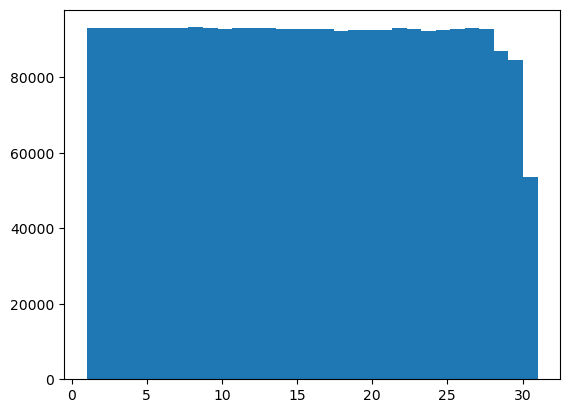

In [13]:
plt.hist(days, 31)

(array([112152., 112734., 112952., 111102., 113406., 114169., 115277.,
        113616., 114283., 114597., 114775., 114201., 113180., 112724.,
        112977., 113642., 112407., 111165., 110228., 107860., 106809.,
        106403., 106421., 105748., 105085.,  38742.]),
 array([1995.        , 1995.96153846, 1996.92307692, 1997.88461538,
        1998.84615385, 1999.80769231, 2000.76923077, 2001.73076923,
        2002.69230769, 2003.65384615, 2004.61538462, 2005.57692308,
        2006.53846154, 2007.5       , 2008.46153846, 2009.42307692,
        2010.38461538, 2011.34615385, 2012.30769231, 2013.26923077,
        2014.23076923, 2015.19230769, 2016.15384615, 2017.11538462,
        2018.07692308, 2019.03846154, 2020.        ]),
 <BarContainer object of 26 artists>)

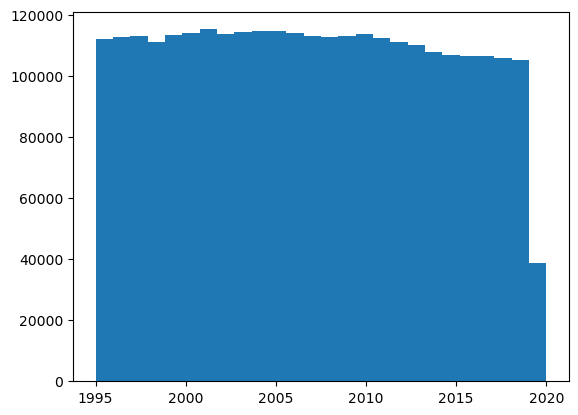

In [14]:
plt.hist(years, 26)

(array([246046., 224721., 246302., 237989., 240315., 228132., 237170.,
        236652., 228865., 236803., 228526., 235134.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

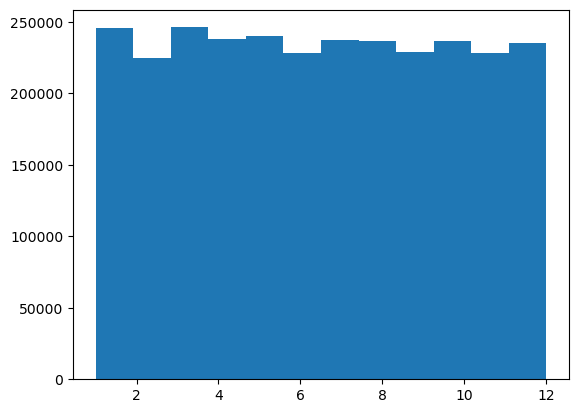

In [15]:
plt.hist(months, 12)